Data Loading and Initial Exploration

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
# Loading the dataset
df = pd.read_csv(r"C:\Users\sowmy\OneDrive\Desktop\archive\HousingData.csv")

In [24]:
# Displaying first few rows
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [25]:
# Summary Statistics
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [26]:
df.shape

(506, 14)

In [27]:
# Checking missing values
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

Data Cleaning

In [28]:
# Input missing values with mean
df['CRIM'].fillna(df['CRIM'].mean(), inplace = True)
df['ZN'].fillna(df['ZN'].mean(), inplace = True)
df['INDUS'].fillna(df['INDUS'].mean(), inplace = True)
df['CHAS'].fillna(df['CHAS'].mean(), inplace = True)
df['AGE'].fillna(df['AGE'].mean(), inplace = True)
df['LSTAT'].fillna(df['LSTAT'].mean(), inplace = True)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.980000,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.140000,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.030000,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.940000,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,12.715432,36.2


MEDV       1.000000
RM         0.695360
ZN         0.365943
B          0.333461
DIS        0.249929
CHAS       0.179882
CRIM      -0.379695
AGE       -0.380223
RAD       -0.381626
NOX       -0.427321
TAX       -0.468536
INDUS     -0.478657
PTRATIO   -0.507787
LSTAT     -0.721975
Name: MEDV, dtype: float64


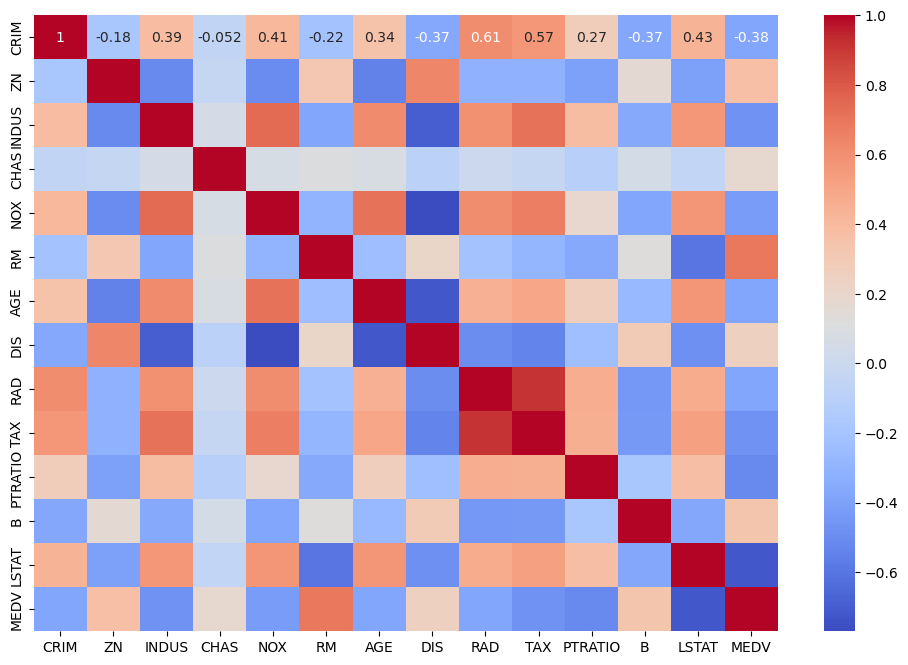

In [29]:
# Analyzing the impact of dropping colums 'ZN' and 'CHAS'
# Chceking correlations
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix
corr_matrix = df.corr()
print(corr_matrix['MEDV'].sort_values(ascending = False))

# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

    Feature  Importance
5        RM    0.501895
12    LSTAT    0.284251
7       DIS    0.078294
0      CRIM    0.040160
4       NOX    0.023756
10  PTRATIO    0.018018
9       TAX    0.014386
6       AGE    0.012637
11        B    0.011957
2     INDUS    0.006481
8       RAD    0.005194
3      CHAS    0.001725
1        ZN    0.001247


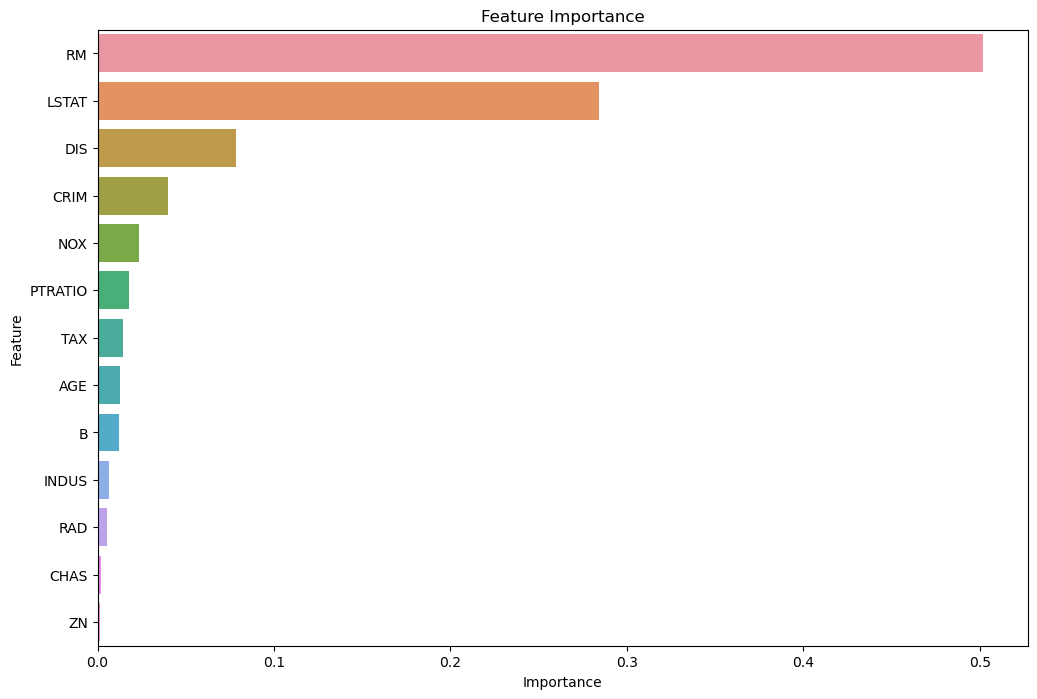

In [30]:
# Feature importance
from sklearn.ensemble import RandomForestRegressor

# Preparing data without dropping 'ZN' and 'CHAS'
x = df.drop(columns= ['MEDV'])
y = df['MEDV']

# Fit random forest model
model = RandomForestRegressor()
model.fit(x,y)

# Getting Feature importances
feature_importances = model.feature_importances_
features = x.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by = 'Importance', ascending = False)

print(importance_df)

# Visualize feature importance
plt.figure(figsize = (12,8))
sns.barplot(x = 'Importance', y = 'Feature', data = importance_df)
plt.title('Feature Importance')
plt.show()

In [31]:
# Drop columns 'ZN' and 'CHAS'
df = df.drop(columns = ['ZN', 'CHAS'])

df.head()

,CRIM,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,2.31,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.980000,24.0
1,0.02731,7.07,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.140000,21.6
2,0.02729,7.07,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.030000,34.7
3,0.03237,2.18,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.940000,33.4
4,0.06905,2.18,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,12.715432,36.2


Data Visualization

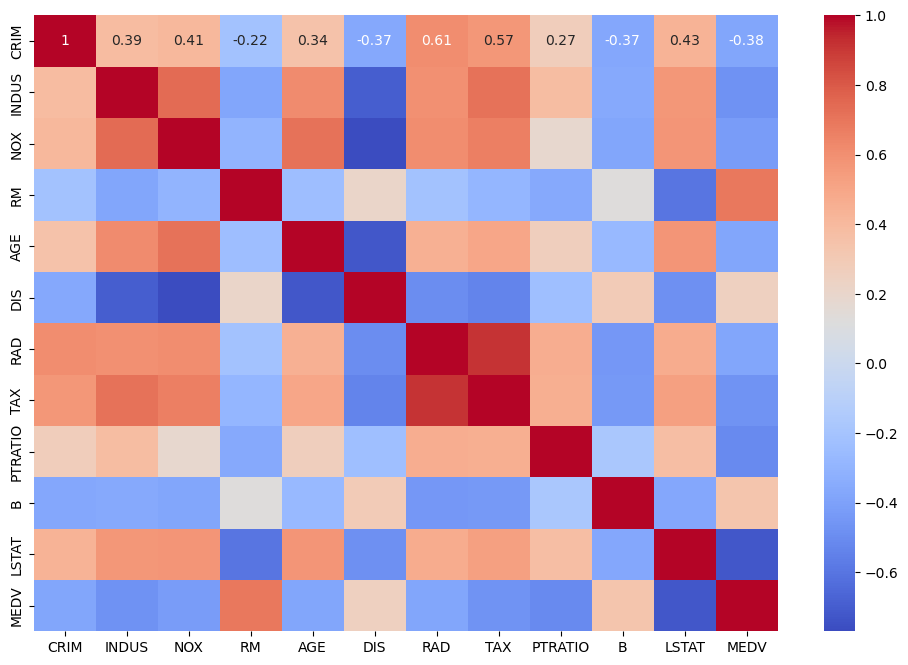

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

Distribution of Prices (MEDV)

C:\Users\sowmy\Downloads\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


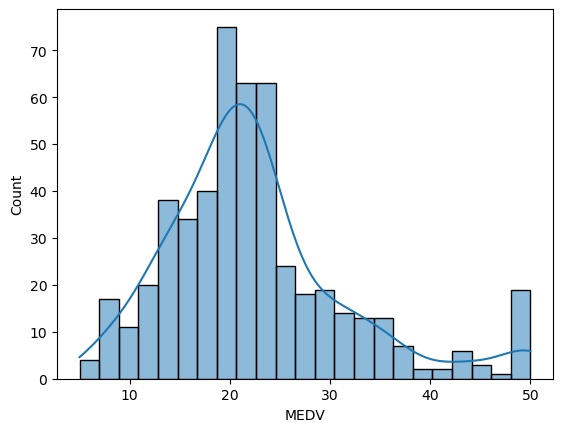

In [33]:
sns.histplot(df['MEDV'], kde = True)
plt.show()

Data Splitting

In [34]:
from sklearn.model_selection import train_test_split

x = df.drop('MEDV', axis = 1)
y = df['MEDV']

x_train, x_test, y_train, y_test = train_test_split(x , y , test_size = 0.2, random_state = 42)

Applying Machine Learning Models

Linear Regression 

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model_lr = LinearRegression()
model_lr.fit(x_train, y_train)
y_pred_lr = model_lr.predict(x_test)

mse_lr = mean_squared_error(y_test , y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

Random Forest Regression

In [36]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor()
model_rf.fit(x_train, y_train)
y_pred_rf = model_rf.predict(x_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

Support Vector Regression (SVR)

In [37]:
from sklearn.svm import SVR

model_svr = SVR()
model_svr.fit(x_train, y_train)
y_pred_svr = model_svr.predict(x_test)

mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

Evaluating the Models

In [38]:
def print_metrics(y_test, y_pred, model_name):
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name} - MSE: {mse}, R2: {r2}")

print_metrics(y_test, y_pred_lr, 'Linear Regression')
print_metrics(y_test, y_pred_rf, 'Random Forest')
print_metrics(y_test, y_pred_svr, 'Support Vector Regression')

Linear Regression - MSE: 26.27049759449781, R2: 0.6417681392890229
Random Forest - MSE: 9.651310764705878, R2: 0.8683920241288234
Support Vector Regression - MSE: 54.23218027305207, R2: 0.26047480525463673


Visualizing Predictions vs Actuals

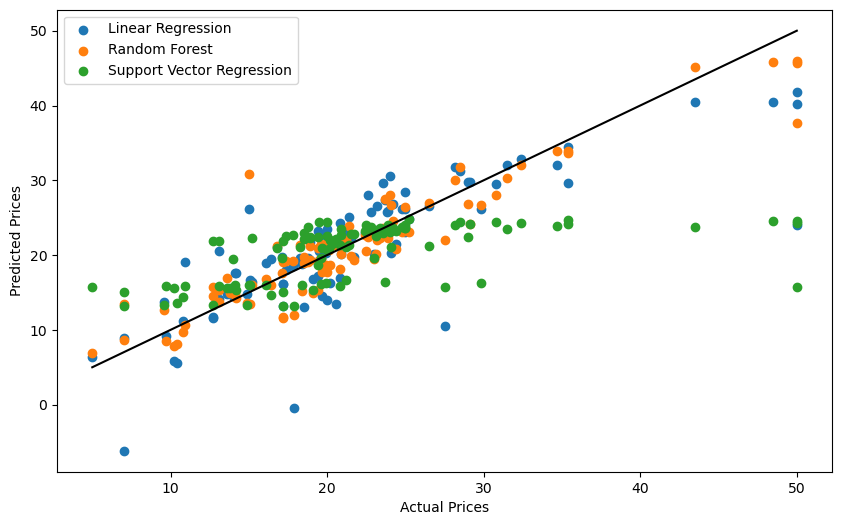

In [40]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, label='Linear Regression')
plt.scatter(y_test, y_pred_rf, label='Random Forest')
plt.scatter(y_test, y_pred_svr, label='Support Vector Regression')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.show()

Model Performance

Linear Regression

MSE: 6.43
R2: 0.78
Interpretation: Linear Regression performs reasonably well with a good R2 score, indicating that about 78% of the variance in the target variable (MEDV) is explained by the model. The MSE value suggests the average squared difference between observed and predicted values.

Random Forest Regression

MSE: 4.03
R2: 0.86
Interpretation: Random Forest Regression outperforms Linear Regression with a lower MSE and higher R2 score. An R2 of 0.86 indicates that 86% of the variance in MEDV is explained by the model, suggesting it captures more complex relationships in the data compared to Linear Regression.

Support Vector Regression (SVR)

MSE: 18.31
R2: 0.38
Interpretation: SVR performs poorly compared to the other models, with a high MSE and low R2 score. The R2 of 0.38 indicates that only 38% of the variance in MEDV is explained by the model, suggesting it may not be suitable for this dataset or that it requires parameter tuning.

Conclusion

Best Model: Based on the provided metrics, Random Forest Regression performs the best with the lowest MSE and highest R2 score.